<a href="https://colab.research.google.com/github/srpn97/driving-simulator-data-analysis/blob/main/process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
cd drive/MyDrive/Driving Data/Test Data/Srija

[Errno 2] No such file or directory: 'drive/MyDrive/Driving Data/Test Data/Srija'
/content/drive/MyDrive/Driving Data


In [136]:
cd ..

/content/drive/MyDrive/Driving Data/Test Data


# Old Code

### **Cleaning Code Old**

In [ ]:
import pandas as pd

# Load the eye tracker data from XLSX
eye_tracker_data = pd.read_excel('srija_t.xlsx')

# Load the Python logger data from CSV
python_logger_data = pd.read_csv('car_inputs_2.csv')

# Get the start time from the Python logger data
python_start_time = python_logger_data['timestamp'].min()
print(python_start_time, "timestamp")

# Convert 'system time' from microseconds to Unix timestamp
eye_tracker_data['system_time_unix'] = eye_tracker_data['system time'] // 1000000

# Find the 'Experiment Starts' message time in the eye tracker data
experiment_starts_time = eye_tracker_data[eye_tracker_data['message'] == 'Experiment Starts']['system_time_unix'].max()
print(experiment_starts_time, "Experiment Start Time")

# Find the last click event time after 500ms from the 'Experiment Starts' message
eye_tracker_last_click_mask = (eye_tracker_data['message'].str.contains('mouse click')) & (eye_tracker_data['system_time_unix'] > experiment_starts_time + 0.5)
if eye_tracker_last_click_mask.any():
    eye_tracker_last_click_time = eye_tracker_data[eye_tracker_last_click_mask]['system_time_unix'].max()
    print(eye_tracker_last_click_time, "Experiment Last Click Time")
else:
    print("Last click event after 500ms from 'Experiment Starts' not found in the eye tracker data.")

1714158426.9526284 timestamp
40196 Experiment Start Time
40567 Experiment Last Click Time


In [ ]:
import pandas as pd

# Load the eye tracker data from XLSX
eye_tracker_data = pd.read_excel('srija_t.xlsx')

# Load the Python logger data from CSV
python_logger_data = pd.read_csv('car_inputs_2.csv')

# Get the start time from the Python logger data
python_start_time = python_logger_data['timestamp'].min()
print(python_start_time, "timestamp")

# Convert 'system time' from microseconds to Unix timestamp
eye_tracker_data['system_time_unix'] = eye_tracker_data['system time'] // 1000000

# Find the 'Experiment Starts' message time in the eye tracker data
experiment_starts_time = eye_tracker_data[eye_tracker_data['message'] == 'Experiment Starts']['system_time_unix'].max()
print(experiment_starts_time, "Experiment Start Time")

# Find the last click event time after 500ms from the 'Experiment Starts' message
# Find the 'Experiment Starts' message time in the eye tracker data
experiment_starts_time = eye_tracker_data[eye_tracker_data['message'] == 'Experiment Starts']['system_time_unix'].max()
print(experiment_starts_time, "Experiment Start Time")

# Find the first click event time after 500ms from the 'Experiment Starts' message
eye_tracker_last_click_mask = (eye_tracker_data['message'].str.contains('mouse click')) & (eye_tracker_data['system_time_unix'] > experiment_starts_time + 0.5)
if eye_tracker_last_click_mask.any():
    eye_tracker_last_click_time = eye_tracker_data[eye_tracker_last_click_mask]['system_time_unix'].min()
    print(eye_tracker_last_click_time, "Experiment Last Click Time")

    # Find the index of the first mouse click event after 500ms from the 'Experiment Starts' message
    last_click_index = eye_tracker_data[eye_tracker_last_click_mask].index[0]
    next_row_index = last_click_index + 1
    print("last:", last_click_index, "next", next_row_index)

    # Insert the Python logger start time for the row after the last click event
    eye_tracker_data.loc[next_row_index, 'synchronized_timestamp'] = python_start_time

    # eye_tracker_data.to_excel('synchronized_eye_tracker_data.xlsx', index=False)
    print("Timestamps synchronized successfully.")
    print("Synchronized data saved to 'synchronized_eye_tracker_data.xlsx'.")
else:
    print("Last click event after 500ms from 'Experiment Starts' not found in the eye tracker data.")

# Calculate the time difference between each eye tracker timestamp and the last click event time
eye_tracker_data['time_diff'] = eye_tracker_data['divice time'] - eye_tracker_last_click_time

# Add the time difference to python_start_time to get the synchronized Unix timestamp
eye_tracker_data['synchronized_timestamp'] = eye_tracker_data['time_diff'] + python_start_time

# Convert the synchronized Unix timestamp to a readable format (optional)
eye_tracker_data['synchronized_time'] = pd.to_datetime(eye_tracker_data['synchronized_timestamp'], unit='s')

# Save the updated eye tracker data to a new file
eye_tracker_data.to_csv('synchronized_eye_tracker_data.csv', index=False)

# Synchronize the data
first_timestamp = python_logger_data['timestamp'].min()
last_timestamp = python_logger_data['timestamp'].max()
eye_tracker_data = eye_tracker_data[(eye_tracker_data['synchronized_timestamp'] >= first_timestamp) &
                                    (eye_tracker_data['synchronized_timestamp'] <= last_timestamp)]

# Handle missing data
python_logger_data.fillna(0, inplace=True)  # Fill missing values with 0 (adjust as needed)
eye_tracker_data.interpolate(inplace=True)  # Interpolate missing values (adjust as needed)

# Merge the data
merged_data = pd.merge(python_logger_data, eye_tracker_data, left_on='timestamp', right_on='synchronized_timestamp', how='outer')

# Perform additional cleaning and preprocessing
merged_data.drop_duplicates(inplace=True)  # Remove duplicate rows
merged_data['event_type'] = merged_data['event_type'].astype('category')  # Convert event_type to categorical

# Save the cleaned data
merged_data.to_csv('cleaned_data.csv', index=False)

1714158426.9526284 timestamp
40196 Experiment Start Time
40196 Experiment Start Time
40199 Experiment Last Click Time
last: 501 next 502
Timestamps synchronized successfully.
Synchronized data saved to 'synchronized_eye_tracker_data.xlsx'.


In [ ]:
import pandas as pd

# Load the eye tracker data from XLSX
eye_tracker_data = pd.read_excel('srija_t.xlsx')

# Load the Python logger data from CSV
python_logger_data = pd.read_csv('car_inputs_2.csv')

# Get the start time from the Python logger data
python_start_time = python_logger_data['timestamp'].min()
print(python_start_time, "timestamp")

# Find the 'started' message in the eye tracker data
started_mask = eye_tracker_data['message'] == 'started'
if started_mask.any():
    started_index = eye_tracker_data[started_mask].index[0]
    print("Started index:", started_index)

    # Set the synchronized timestamp for the 'started' message
    eye_tracker_data.loc[started_index, 'synchronized_timestamp'] = python_start_time

    # Calculate the synchronized timestamps for subsequent cells
    for i in range(started_index + 1, len(eye_tracker_data)):
        time_diff = (eye_tracker_data.loc[i, 'system time'] - eye_tracker_data.loc[i-1, 'system time']) / 1000000
        eye_tracker_data.loc[i, 'synchronized_timestamp'] = eye_tracker_data.loc[i-1, 'synchronized_timestamp'] + time_diff

    # Update the synchronized timestamp for rows before the 'started' message
    eye_tracker_data.loc[:started_index-1, 'synchronized_timestamp'] = eye_tracker_data.loc[:started_index-1, 'system time'] / 1000000

    # Convert the synchronized timestamp to datetime format
    eye_tracker_data['synchronized_time'] = pd.to_datetime(eye_tracker_data['synchronized_timestamp'], unit='s')

    # Save the updated eye tracker data to a new Excel file
    eye_tracker_data.to_excel('synchronized_eye_tracker_data.xlsx', index=False)

    print("Timestamps synchronized successfully.")
    # print("Synchronized data saved to 'synchronized_eye_tracker_data.xlsx'.")
else:
    print("'started' message not found in the eye tracker data.")


first_timestamp = python_logger_data['timestamp'].min()
last_timestamp = python_logger_data['timestamp'].max()
eye_tracker_data = eye_tracker_data[(eye_tracker_data['synchronized_timestamp'] >= first_timestamp) &
                                    (eye_tracker_data['synchronized_timestamp'] <= last_timestamp)]

# Handle missing data
python_logger_data.fillna(0, inplace=True)  # Fill missing values with 0 (adjust as needed)
eye_tracker_data.interpolate(inplace=True)  # Interpolate missing values (adjust as needed)

# Merge the data
merged_data = pd.merge(python_logger_data, eye_tracker_data, left_on='timestamp', right_on='synchronized_timestamp', how='outer')

# Perform additional cleaning and preprocessing
merged_data.drop_duplicates(inplace=True)  # Remove duplicate rows
merged_data['event_type'] = merged_data['event_type'].astype('category')  # Convert event_type to categorical

# Save the cleaned data
merged_data.to_csv('cleaned_data.csv', index=False)

1714158426.9526284 timestamp
Started index: 588
Timestamps synchronized successfully.


In [15]:
import pandas as pd

# Load the eye tracker data from XLSX
eye_tracker_data = pd.read_excel('srija_t.xlsx')
print(eye_tracker_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44828 entries, 0 to 44827
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system time               44828 non-null  int64  
 1   message                   44828 non-null  object 
 2   divice time               44828 non-null  int64  
 3   leftGazePointDisplay      42155 non-null  float64
 4   leftGazePointDisplay.1    42155 non-null  float64
 5   leftGazePointCoords       42155 non-null  float64
 6   leftGazePointCoords.1     42155 non-null  float64
 7   leftGazePointCoords.2     42155 non-null  float64
 8   leftGazeOriginDisplay     42188 non-null  float64
 9   leftGazeOriginDisplay.1   42188 non-null  float64
 10  leftGazeOriginDisplay.2   42188 non-null  float64
 11  leftGazeOriginCoords      42188 non-null  float64
 12  leftGazeOriginCoords.1    42188 non-null  float64
 13  leftGazeOriginCoords.2    42188 non-null  float64
 14  leftPu

### **Analysis Part Old**

Average left pupil diameter during instruction: 3.151506738243268
Average right pupil diameter during instruction: 3.544345211703678
Average left pupil diameter during user_response: 3.173720881144206
Average right pupil diameter during user_response: 3.63943314980517
Average left pupil diameter during button_press: 3.2167476696254775
Average right pupil diameter during button_press: 3.694334248317556


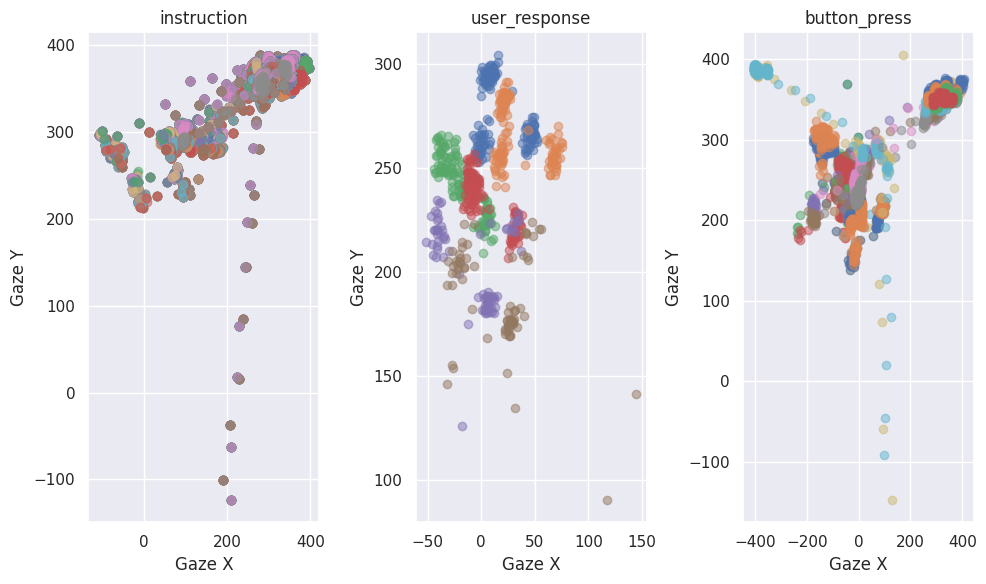

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned Python logger data
python_logger_data = pd.read_csv('cleaned_python_logger_data.csv')

# Load the synchronized eye tracker data
eye_tracker_data = pd.read_excel('synchronized_eye_tracker_data.xlsx')

# Identify events of interest
events_of_interest = ['instruction', 'user_response', 'button_press']

# Extract event timestamps
event_timestamps = {}
for event in events_of_interest:
    event_timestamps[event] = python_logger_data[python_logger_data['event_type'] == event]['timestamp'].tolist()

# print(event_timestamps, "event_timestamps")

# Align events with eye tracker data
aligned_data = {}
for event in events_of_interest:
    aligned_data[event] = []
    for timestamp in event_timestamps[event]:
        gaze_data = eye_tracker_data[(eye_tracker_data['synchronized_timestamp'] >= timestamp - 0.5) &
                                     (eye_tracker_data['synchronized_timestamp'] <= timestamp + 0.5)]
        aligned_data[event].append(gaze_data)

# print(aligned_data, "aligned_data")

# Analyze gaze patterns during events
for event in events_of_interest:
    left_pupil_diameters = []
    right_pupil_diameters = []
    for gaze_data in aligned_data[event]:
        left_pupil_diameters.append(gaze_data['leftPupilDiameter'].mean())
        right_pupil_diameters.append(gaze_data['rightPupilDiameter'].mean())
    print(f"Average left pupil diameter during {event}: {np.mean(left_pupil_diameters)}")
    print(f"Average right pupil diameter during {event}: {np.mean(right_pupil_diameters)}")

# Visualize gaze patterns during events
plt.figure(figsize=(10, 6))
for i, event in enumerate(events_of_interest):
    plt.subplot(1, len(events_of_interest), i+1)
    for gaze_data in aligned_data[event]:
        plt.scatter(gaze_data['leftGazePointCoords'], gaze_data['leftGazePointCoords.1'], alpha=0.5, label='Left')
        plt.scatter(gaze_data['rightGazePointCoords'], gaze_data['rightGazePointCoords.1'], alpha=0.5, label='Right')
    plt.title(event)
    plt.xlabel('Gaze X')
    plt.ylabel('Gaze Y')
    # plt.legend()
plt.tight_layout()
plt.show()

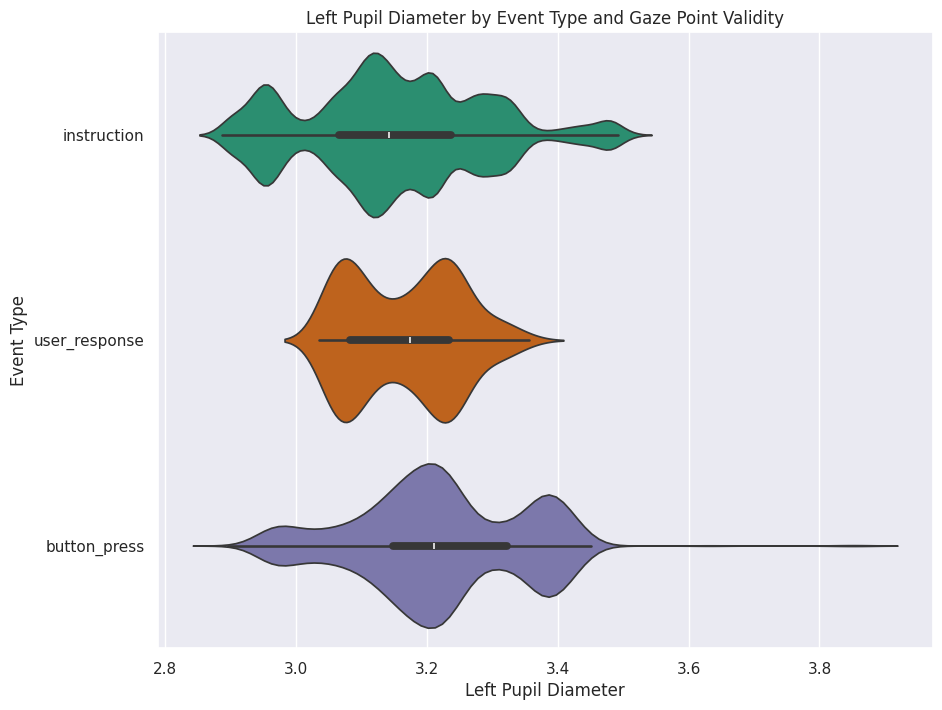

In [ ]:
sns.violinplot(x='leftPupilDiameter', y='event', hue='event', data=filtered_data, palette='Dark2')
plt.xlabel('Left Pupil Diameter')
plt.ylabel('Event Type')
plt.title('Left Pupil Diameter by Event Type and Gaze Point Validity')
plt.show()

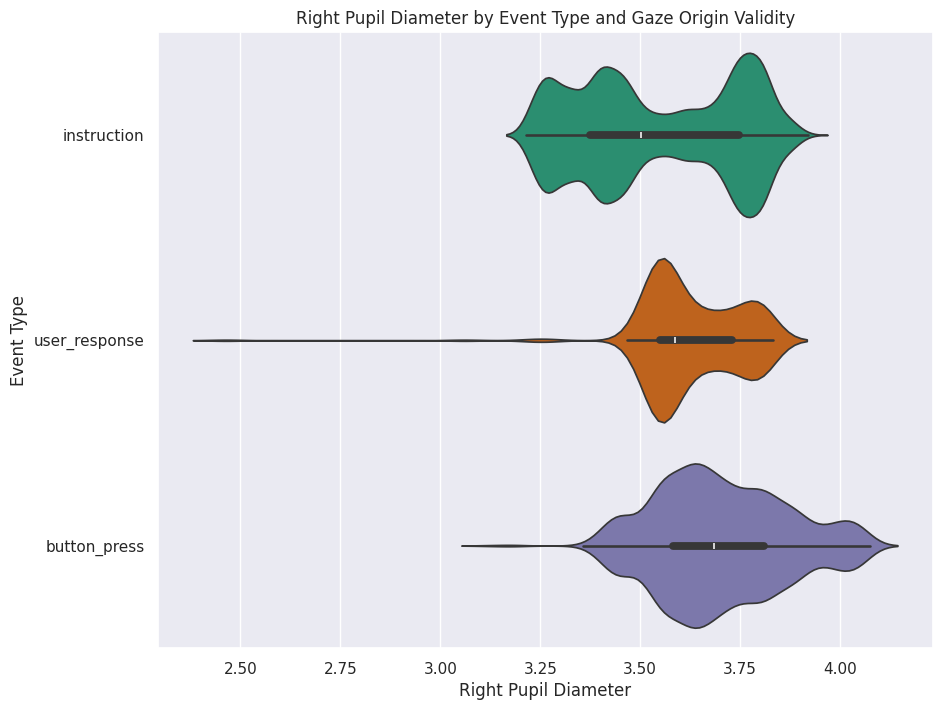

In [ ]:
sns.violinplot(x='rightPupilDiameter', y='event', hue='event', data=filtered_data, palette='Dark2')
plt.xlabel('Right Pupil Diameter')
plt.ylabel('Event Type')
plt.title('Right Pupil Diameter by Event Type and Gaze Origin Validity')
plt.show()

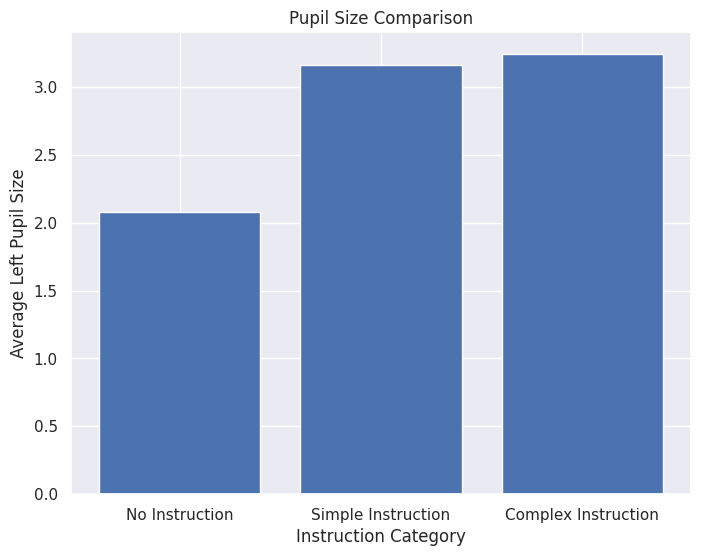

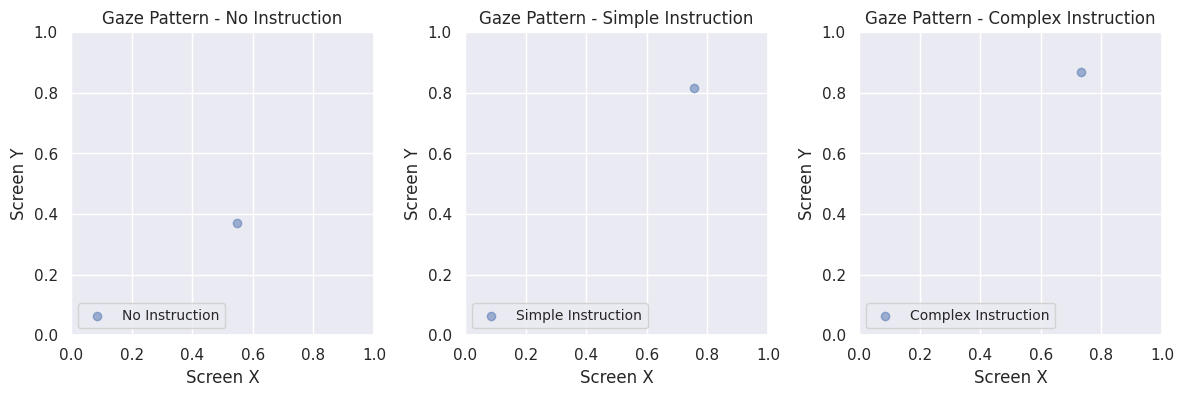

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned Python logger data
python_logger_data = pd.read_csv('cleaned_python_logger_data.csv')

# Load the synchronized eye tracker data
eye_tracker_data = pd.read_excel('synchronized_eye_tracker_data.xlsx')

# Categorize instructions into simple and complex
simple_instructions = [
    "Press the right button on D-Pad but turn left at the next intersection.",
    "Press the Square Button on the steering wheel, to check the current speed of the vehicle and press it again to hide",
    "Press the left button on D-Pad but turn right at the next intersection."
]

complex_instructions = [
    "Humans have four lungs. True or False? Press R2 for true and L2 for false on the steering wheel",
    "Adjust AC temperature, to 64 then increase the temparature to 72 and finally set it to 67"
]

# Extract the starting times for each instruction set
instruction_start_times = python_logger_data[python_logger_data['event_type'] == 'instruction']['timestamp'].tolist()

# Analyze pupil size and gaze patterns
def analyze_pupil_size(data, start_time, end_time):
    filtered_data = data[(data['synchronized_timestamp'] >= start_time) & (data['synchronized_timestamp'] <= end_time)]
    left_pupil_size = filtered_data['leftPupilDiameter'].mean()
    right_pupil_size = filtered_data['rightPupilDiameter'].mean()
    return left_pupil_size, right_pupil_size

def analyze_gaze_pattern(data, start_time, end_time):
    filtered_data = data[(data['synchronized_timestamp'] >= start_time) & (data['synchronized_timestamp'] <= end_time)]
    left_gaze_x = filtered_data['leftGazePointDisplay'].mean()
    left_gaze_y = filtered_data['leftGazePointDisplay.1'].mean()
    right_gaze_x = filtered_data['rightGazePointDisplay'].mean()
    right_gaze_y = filtered_data['rightGazePointDisplay.1'].mean()
    return left_gaze_x, left_gaze_y, right_gaze_x, right_gaze_y

# Analyze pupil size and gaze patterns for no instruction (first 30 seconds)
no_instruction_start_time = eye_tracker_data['synchronized_timestamp'].min()
no_instruction_end_time = no_instruction_start_time + 30

no_instruction_left_pupil, no_instruction_right_pupil = analyze_pupil_size(eye_tracker_data, no_instruction_start_time, no_instruction_end_time)
no_instruction_left_gaze_x, no_instruction_left_gaze_y, no_instruction_right_gaze_x, no_instruction_right_gaze_y = analyze_gaze_pattern(eye_tracker_data, no_instruction_start_time, no_instruction_end_time)

# Analyze pupil size and gaze patterns for simple instructions
simple_left_pupil_sizes = []
simple_right_pupil_sizes = []
simple_left_gaze_xs = []
simple_left_gaze_ys = []
simple_right_gaze_xs = []
simple_right_gaze_ys = []

for start_time in instruction_start_times:
    instruction = python_logger_data[python_logger_data['timestamp'] == start_time]['instruction'].iloc[0]
    if instruction in simple_instructions:
        end_time = start_time + 5  # Analyze 5 seconds after the instruction starts
        left_pupil, right_pupil = analyze_pupil_size(eye_tracker_data, start_time, end_time)
        left_gaze_x, left_gaze_y, right_gaze_x, right_gaze_y = analyze_gaze_pattern(eye_tracker_data, start_time, end_time)
        simple_left_pupil_sizes.append(left_pupil)
        simple_right_pupil_sizes.append(right_pupil)
        simple_left_gaze_xs.append(left_gaze_x)
        simple_left_gaze_ys.append(left_gaze_y)
        simple_right_gaze_xs.append(right_gaze_x)
        simple_right_gaze_ys.append(right_gaze_y)

# Analyze pupil size and gaze patterns for complex instructions
complex_left_pupil_sizes = []
complex_right_pupil_sizes = []
complex_left_gaze_xs = []
complex_left_gaze_ys = []
complex_right_gaze_xs = []
complex_right_gaze_ys = []

for start_time in instruction_start_times:
    instruction = python_logger_data[python_logger_data['timestamp'] == start_time]['instruction'].iloc[0]
    if instruction in complex_instructions:
        end_time = start_time + 5  # Analyze 5 seconds after the instruction starts
        left_pupil, right_pupil = analyze_pupil_size(eye_tracker_data, start_time, end_time)
        left_gaze_x, left_gaze_y, right_gaze_x, right_gaze_y = analyze_gaze_pattern(eye_tracker_data, start_time, end_time)
        complex_left_pupil_sizes.append(left_pupil)
        complex_right_pupil_sizes.append(right_pupil)
        complex_left_gaze_xs.append(left_gaze_x)
        complex_left_gaze_ys.append(left_gaze_y)
        complex_right_gaze_xs.append(right_gaze_x)
        complex_right_gaze_ys.append(right_gaze_y)

# Visualize pupil size comparison
pupil_sizes = [no_instruction_left_pupil, np.mean(simple_left_pupil_sizes), np.mean(complex_left_pupil_sizes)]
categories = ['No Instruction', 'Simple Instruction', 'Complex Instruction']

plt.figure(figsize=(8, 6))
plt.bar(categories, pupil_sizes)
plt.xlabel('Instruction Category')
plt.ylabel('Average Left Pupil Size')
plt.title('Pupil Size Comparison')
plt.show()

# Visualize gaze patterns
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(no_instruction_left_gaze_x, 1 - no_instruction_left_gaze_y, alpha=0.5, label='No Instruction')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Screen X')
plt.ylabel('Screen Y')
plt.legend(loc='lower left', fontsize='small')
plt.title('Gaze Pattern - No Instruction')

plt.subplot(1, 3, 2)
plt.scatter(np.mean(simple_left_gaze_xs), 1 - np.mean(simple_left_gaze_ys), alpha=0.5, label='Simple Instruction')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Screen X')
plt.ylabel('Screen Y')
plt.legend(loc='lower left', fontsize='small')
plt.title('Gaze Pattern - Simple Instruction')

plt.subplot(1, 3, 3)
plt.scatter(np.mean(complex_left_gaze_xs), 1 - np.mean(complex_left_gaze_ys), alpha=0.5, label='Complex Instruction')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Screen X')
plt.ylabel('Screen Y')
plt.legend(loc='lower left', fontsize='small')
plt.title('Gaze Pattern - Complex Instruction')

plt.tight_layout()
plt.show()

# New Code

### **Clean Data Main**

In [53]:
import pandas as pd

# Load the eye tracker data from XLSX
eye_tracker_data = pd.read_excel('pragnesh_t2.xlsx')

eye_tracker_data.dropna(inplace=True)
eye_tracker_data.reset_index(drop=True, inplace=True)
# Load the Python logger data from CSV
python_logger_data = pd.read_csv('car_inputs_19.csv')

# Get the start time from the Python logger data
python_start_time = python_logger_data['timestamp'].min()
print(python_start_time, "timestamp")

# Find the 'started' message in the eye tracker data
started_mask = eye_tracker_data['message'] == 'started'
if started_mask.any():
    started_index = eye_tracker_data[started_mask].index[0]
    print("Started index:", started_index)

    # Set the synchronized timestamp for the 'started' message
    eye_tracker_data.loc[started_index, 'synchronized_timestamp'] = python_start_time

    # Calculate the synchronized timestamps for subsequent cells
    for i in range(started_index + 1, len(eye_tracker_data)):
        time_diff = (eye_tracker_data.loc[i, 'system time'] - eye_tracker_data.loc[i-1, 'system time']) / 1000000
        eye_tracker_data.loc[i, 'synchronized_timestamp'] = eye_tracker_data.loc[i-1, 'synchronized_timestamp'] + time_diff

    # Update the synchronized timestamp for rows before the 'started' message
    eye_tracker_data.loc[:started_index-1, 'synchronized_timestamp'] = eye_tracker_data.loc[:started_index-1, 'system time'] / 1000000

    # Convert the synchronized timestamp to datetime format
    eye_tracker_data['synchronized_time'] = pd.to_datetime(eye_tracker_data['synchronized_timestamp'], unit='s')

    # Save the synchronized eye tracker data to a new file
    eye_tracker_data.to_excel('6_et_sync_3.xlsx', index=False)
    print("Synchronized eye tracker data saved to 'synchronized_eye_tracker_data.xlsx'.")
else:
    print("'started' message not found in the eye tracker data.")

# Clean and preprocess the Python logger data
python_logger_data.fillna(0, inplace=True)  # Fill missing values with 0 (adjust as needed)
python_logger_data['event_type'] = python_logger_data['event_type'].astype('category')  # Convert event_type to categorical

# Save the cleaned Python logger data to a new file
python_logger_data.to_csv('6_cleaned_py_3.csv', index=False)
print("Cleaned Python logger data saved to 'cleaned_python_logger_data.csv'.")

1714172920.864479 timestamp
Started index: 229
Synchronized eye tracker data saved to 'synchronized_eye_tracker_data.xlsx'.
Cleaned Python logger data saved to 'cleaned_python_logger_data.csv'.


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the cleaned Python logger data
python_logger_data = pd.read_csv('6_cleaned_py_3.csv')

# Load the synchronized eye tracker data
eye_tracker_data = pd.read_excel('6_et_sync_3.xlsx')

# Categorize instructions into simple and complex
simple_instructions = [
    "Press the right button on D-Pad but turn left at the next intersection.",
    "Press the Square Button on the steering wheel, to check the current speed of the vehicle and press it again to hide",
    "Press the left button on D-Pad but turn right at the next intersection.",
    "The capital of France is Paris. True or False? Press R2 for True and L2 for False",
    "Come to a complete stop, wait for 2 seconds, then start driving again",
    "Take a U Turn whenever possible, press the appropriate button on the D-Pad before turning in that direction",
    "Park the car in a safe spot, wait for 5 seconds, then start driving again. Use left paddle shift to reverse car if necessary",
    "Press the Square Button on the steering wheel, and read out the current speed of vehicle"
]

complex_instructions = [
    "Humans have four lungs. True or False? Press R2 for true and L2 for false on the steering wheel",
    "Adjust AC temperature, to 64 then increase the temperature to 72 and finally set it to 67",
    "What is 14 + 27? Press R3 if the answer is greater than 40, or L3 if it's less than 40.",
    "Text Message Alert (Read the following text out Loud): Hey, We are waiting for you here, how much longer for you to reach?",
    "Press Triangle to change the weather. Keep changing until you see rain and then change to any other weather preset",
    "The sum of the angles in a triangle is 180 degrees. True or False? Press R2 for True and L2 for False",
    "Set the AC temparature to any number between 72 to 80, the number has to be an odd number"
]

### **Gaze Pattern Analysis**

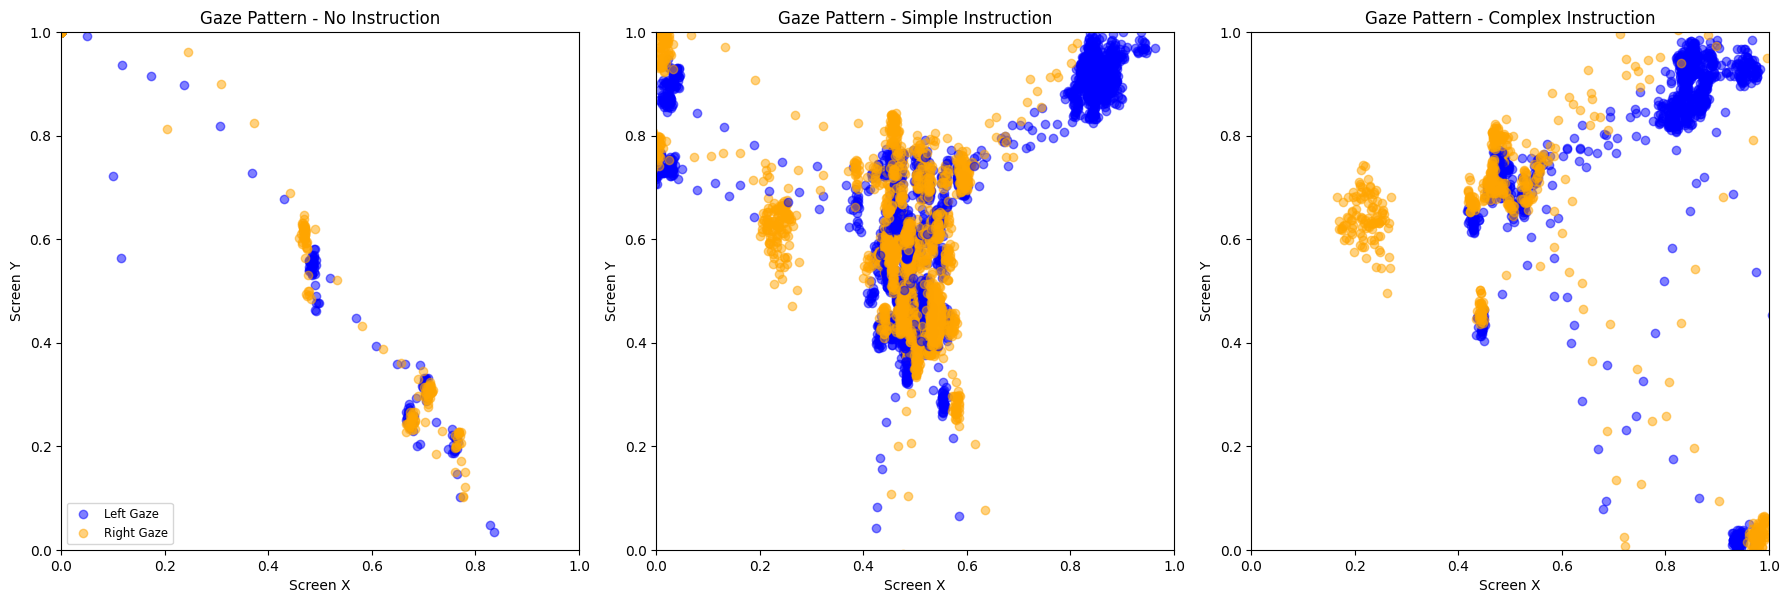

In [133]:

# Extract the starting times for each instruction set
instruction_start_times = python_logger_data[python_logger_data['event_type'] == 'instruction']['timestamp'].tolist()

# Define the function to analyze gaze patterns
def analyze_gaze_pattern(data, start_time, duration=8):  # I've adjusted this for a standard call
    filtered_data = data[(data['synchronized_timestamp'] >= start_time - 0.5) & (data['synchronized_timestamp'] <= start_time + duration)]
    return filtered_data

# Define the function to analyze gaze patterns for the no instruction period
def analyze_gaze_pattern_clean(data, start_time, duration=30):  # For no instruction, using 30 seconds
    filtered_data = data[(data['synchronized_timestamp'] >= start_time) & (data['synchronized_timestamp'] <= start_time + duration)]
    return filtered_data

# Extract gaze data for no instruction period
no_instruction_start_time = eye_tracker_data['synchronized_timestamp'].min()
no_instruction_gaze_data = analyze_gaze_pattern_clean(eye_tracker_data, no_instruction_start_time, 30)

# Analyze gaze patterns for simple and complex instructions
simple_gaze_data = []
complex_gaze_data = []

last_instruction = ""
for start_time in instruction_start_times:
    instruction = python_logger_data[python_logger_data['timestamp'] == start_time]['instruction'].iloc[0]
    if instruction != last_instruction:
        if instruction in simple_instructions:
            gaze_data = analyze_gaze_pattern(eye_tracker_data, start_time)
            simple_gaze_data.append(gaze_data)
        elif instruction in complex_instructions:
            gaze_data = analyze_gaze_pattern(eye_tracker_data, start_time)
            complex_gaze_data.append(gaze_data)
        last_instruction = instruction

# Visualize gaze patterns including no instruction
plt.figure(figsize=(18, 6))

# Function to plot gaze data, handling colors and legends consistently
def plot_gaze_data(gaze_data, subplot_index, title):
    plt.subplot(1, 3, subplot_index)
    for data in gaze_data:
        left_gaze_x = data['leftGazePointDisplay']
        left_gaze_y = data['leftGazePointDisplay.1']
        right_gaze_x = data['rightGazePointDisplay']
        right_gaze_y = data['rightGazePointDisplay.1']
        plt.scatter(left_gaze_x, 1 - left_gaze_y, alpha=0.5, color='blue', label='Left Gaze')
        plt.scatter(right_gaze_x, 1 - right_gaze_y, alpha=0.5, color='orange', label='Right Gaze')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('Screen X')
    plt.ylabel('Screen Y')
    plt.title(title)
    if subplot_index == 1:  # Only add legend in the first plot
        plt.legend(loc='lower left', fontsize='small')

# Plotting all gaze data
plot_gaze_data([no_instruction_gaze_data], 1, 'Gaze Pattern - No Instruction')
plot_gaze_data(simple_gaze_data, 2, 'Gaze Pattern - Simple Instruction')
plot_gaze_data(complex_gaze_data, 3, 'Gaze Pattern - Complex Instruction')

plt.tight_layout()
plt.savefig('6_gaze_pattern_3.png', dpi=300)
plt.show()


### **Pupil Dilation Analysis**

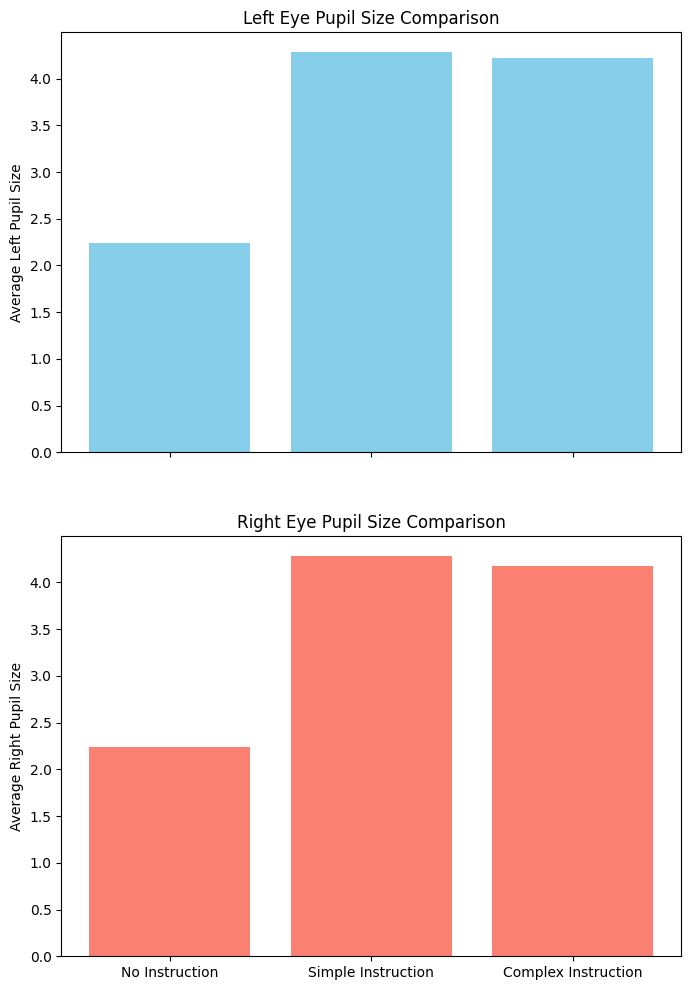

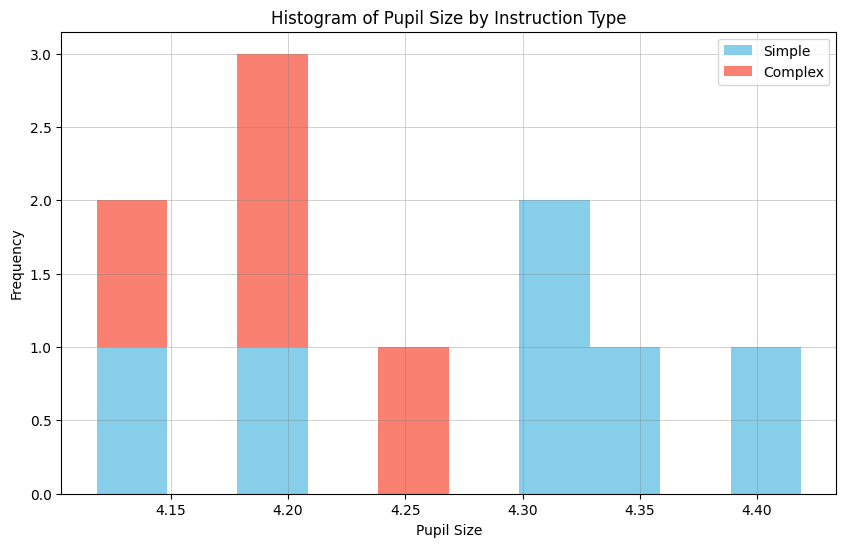

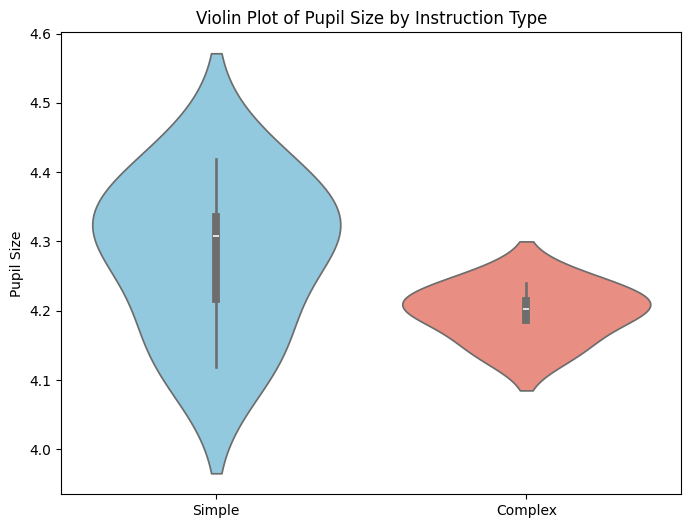

In [134]:

# Function to analyze pupil size
def analyze_pupil_size(data, start_time, end_time):
    filtered_data = data[(data['synchronized_timestamp'] >= start_time) & (data['synchronized_timestamp'] <= end_time)]
    left_pupil_size = filtered_data['leftPupilDiameter'].mean()
    right_pupil_size = filtered_data['rightPupilDiameter'].mean()
    return left_pupil_size, right_pupil_size

# Collect pupil sizes for different instruction types
instruction_start_times = python_logger_data[python_logger_data['event_type'] == 'instruction']['timestamp'].tolist()
no_instruction_start_time = eye_tracker_data['synchronized_timestamp'].min()
no_instruction_end_time = no_instruction_start_time + 30

# No instruction pupil sizes
no_instruction_left_pupil, no_instruction_right_pupil = analyze_pupil_size(eye_tracker_data, no_instruction_start_time, no_instruction_end_time)

# Instruction pupil sizes
simple_left_pupil_sizes = []
simple_right_pupil_sizes = []
complex_left_pupil_sizes = []
complex_right_pupil_sizes = []
last_instruction = ""

for start_time in instruction_start_times:
    instruction = python_logger_data[python_logger_data['timestamp'] == start_time]['instruction'].iloc[0]
    if instruction != last_instruction:
        end_time = start_time + 5  # Analyze 5 seconds after the instruction starts
        left_pupil, right_pupil = analyze_pupil_size(eye_tracker_data, start_time, end_time)
        if instruction in simple_instructions:
            simple_left_pupil_sizes.append(left_pupil)
            simple_right_pupil_sizes.append(right_pupil)
        elif instruction in complex_instructions:
            complex_left_pupil_sizes.append(left_pupil)
            complex_right_pupil_sizes.append(right_pupil)
        last_instruction = instruction

# Bar chart for average pupil size
fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
categories = ['No Instruction', 'Simple Instruction', 'Complex Instruction']
left_pupil_sizes = [no_instruction_left_pupil, np.mean(simple_left_pupil_sizes), np.mean(complex_left_pupil_sizes)]
right_pupil_sizes = [no_instruction_right_pupil, np.mean(simple_right_pupil_sizes), np.mean(complex_right_pupil_sizes)]

axs[0].bar(categories, left_pupil_sizes, color='skyblue')
axs[0].set_ylabel('Average Left Pupil Size')
axs[0].set_title('Left Eye Pupil Size Comparison')


axs[1].bar(categories, right_pupil_sizes, color='salmon')
axs[1].set_ylabel('Average Right Pupil Size')
axs[1].set_title('Right Eye Pupil Size Comparison')
plt.savefig('6_pupil_size_comparison3.png', dpi=300)
plt.show()

# Combined histogram for both eyes
plt.figure(figsize=(10, 6))
plt.hist([simple_left_pupil_sizes + simple_right_pupil_sizes, complex_left_pupil_sizes + complex_right_pupil_sizes], bins=10, color=['skyblue', 'salmon'], stacked=True, label=['Simple', 'Complex'])
plt.xlabel('Pupil Size')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil Size by Instruction Type')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('6_pupil_size_histogram3.png', dpi=300)
plt.show()

# Combined violin plot for both eyes
combined_data = [simple_left_pupil_sizes + simple_right_pupil_sizes, complex_left_pupil_sizes + complex_right_pupil_sizes]
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_data, palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Simple', 'Complex'])
plt.ylabel('Pupil Size')
plt.title('Violin Plot of Pupil Size by Instruction Type')
# plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('6_pupil_size_violin_plot3.png', dpi=300)
plt.show()


In [135]:
import pandas as pd

# Define DataFrame to hold results
columns = [
    'participant_no', 'session_no',
    'no_instruction_left_pupil', 'no_instruction_right_pupil',
    'simple_instruction_left_pupil', 'simple_instruction_right_pupil',
    'complex_instruction_left_pupil', 'complex_instruction_right_pupil'
]
results_df = pd.DataFrame(columns=columns)

# Assuming you have these variables set correctly for each run
participant_no = 6  # Update accordingly for each run
session_no = 3     # Update accordingly for each run

# Collect data for this run into a dictionary
session_data = {
    'participant_no': participant_no,
    'session_no': session_no,
    'no_instruction_left_pupil': no_instruction_left_pupil,
    'no_instruction_right_pupil': no_instruction_right_pupil,
    'simple_instruction_left_pupil': np.mean(simple_left_pupil_sizes),
    'simple_instruction_right_pupil': np.mean(simple_right_pupil_sizes),
    'complex_instruction_left_pupil': np.mean(complex_left_pupil_sizes),
    'complex_instruction_right_pupil': np.mean(complex_right_pupil_sizes)
}

session_data_df = pd.DataFrame([session_data])

# Append the data for this session to the DataFrame
results_df = pd.concat([results_df, session_data_df], ignore_index=True)
print(results_df)

# results_df.to_csv('../pupil_dilation_results.csv', index=False)
# Append DataFrame to an existing CSV file, creating it if it doesn't exist
results_df.to_csv('../pupil_dilation_results.csv', mode='a', index=False, header=False)


  participant_no session_no  no_instruction_left_pupil  \
0              6          3                   2.235346   

   no_instruction_right_pupil  simple_instruction_left_pupil  \
0                    2.244205                       4.281819   

   simple_instruction_right_pupil  complex_instruction_left_pupil  \
0                        4.280205                        4.220491   

   complex_instruction_right_pupil  
0                         4.175387  


# **All Pupil Analysis**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data_path = 'pupil_dilation_results.csv'  # Adjust path if necessary
pupil_data = pd.read_csv(data_path)


pupil_data = pupil_data.apply(pd.to_numeric, errors='coerce', axis=0)
pupil_data['participant_no'] = pupil_data['participant_no'].astype(str)  # Keep participant number as string for grouping
pupil_data['session_no'] = pupil_data['session_no'].astype(str)


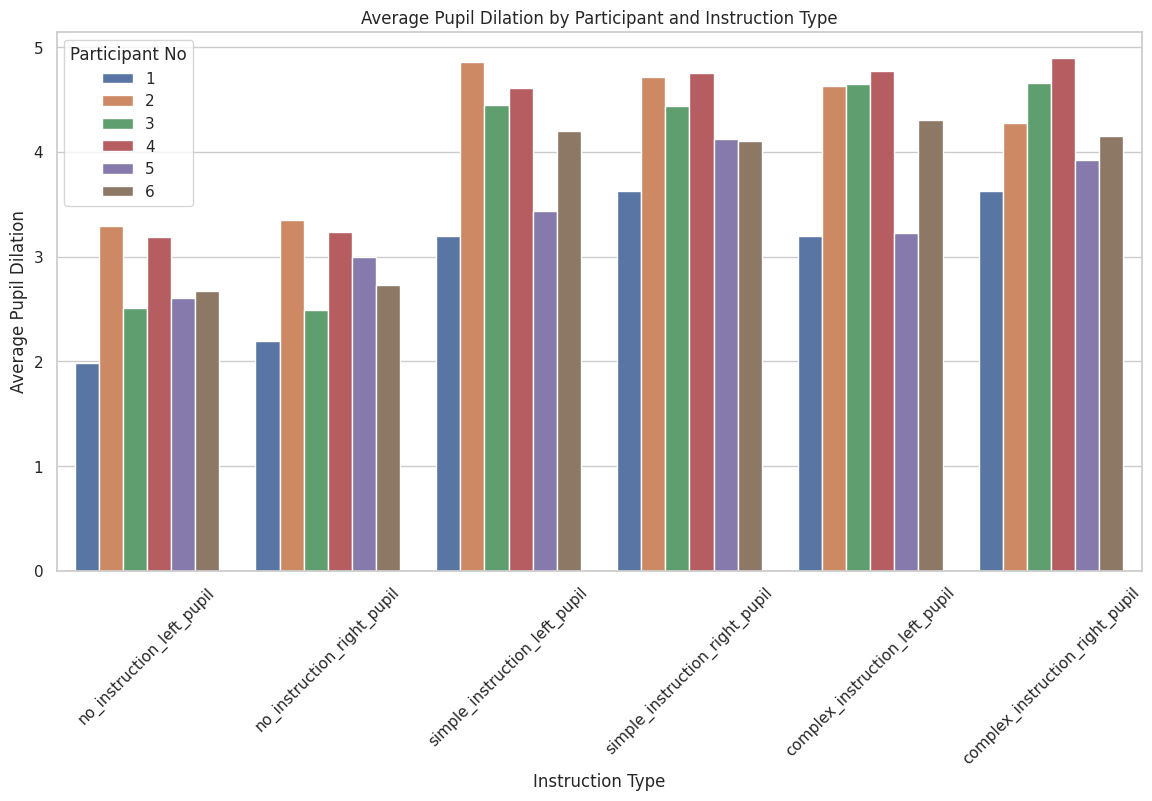

In [143]:
# Calculate the mean pupil dilation for each participant across all sessions
participant_means = pupil_data.groupby('participant_no').mean().reset_index()

# Melt the DataFrame for easier plotting with seaborn
melted_data = pd.melt(participant_means, id_vars=['participant_no'], value_vars=[
    'no_instruction_left_pupil', 'no_instruction_right_pupil',
    'simple_instruction_left_pupil', 'simple_instruction_right_pupil',
    'complex_instruction_left_pupil', 'complex_instruction_right_pupil'
], var_name='instruction_type', value_name='average_pupil_dilation')

# Create a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='instruction_type', y='average_pupil_dilation', hue='participant_no', data=melted_data)
plt.title('Average Pupil Dilation by Participant and Instruction Type')
plt.xticks(rotation=45)
plt.ylabel('Average Pupil Dilation')
plt.xlabel('Instruction Type')
plt.legend(title='Participant No')
plt.show()


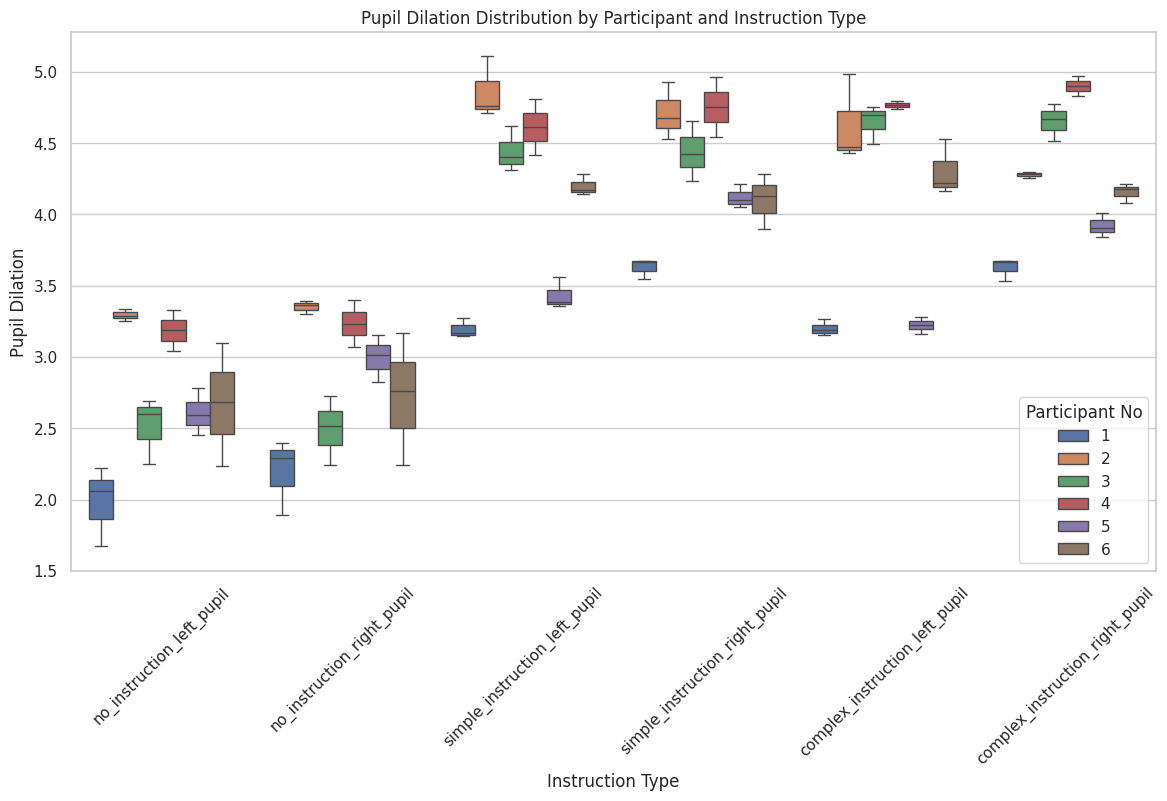

In [145]:
# Melt the DataFrame to format it for seaborn's boxplot
melted_data_box = pd.melt(pupil_data, id_vars=['participant_no'], value_vars=[
    'no_instruction_left_pupil', 'no_instruction_right_pupil',
    'simple_instruction_left_pupil', 'simple_instruction_right_pupil',
    'complex_instruction_left_pupil', 'complex_instruction_right_pupil'
], var_name='instruction_type', value_name='pupil_dilation')

# Create a box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='instruction_type', y='pupil_dilation', hue='participant_no', data=melted_data_box)
plt.title('Pupil Dilation Distribution by Participant and Instruction Type')
plt.xticks(rotation=45)
plt.ylabel('Pupil Dilation')
plt.xlabel('Instruction Type')
plt.legend(title='Participant No', loc='lower right')
plt.show()


In [147]:
unique_participants = session_means['participant_no'].nunique()
print(f"Number of unique participants: {unique_participants}")


Number of unique participants: 6


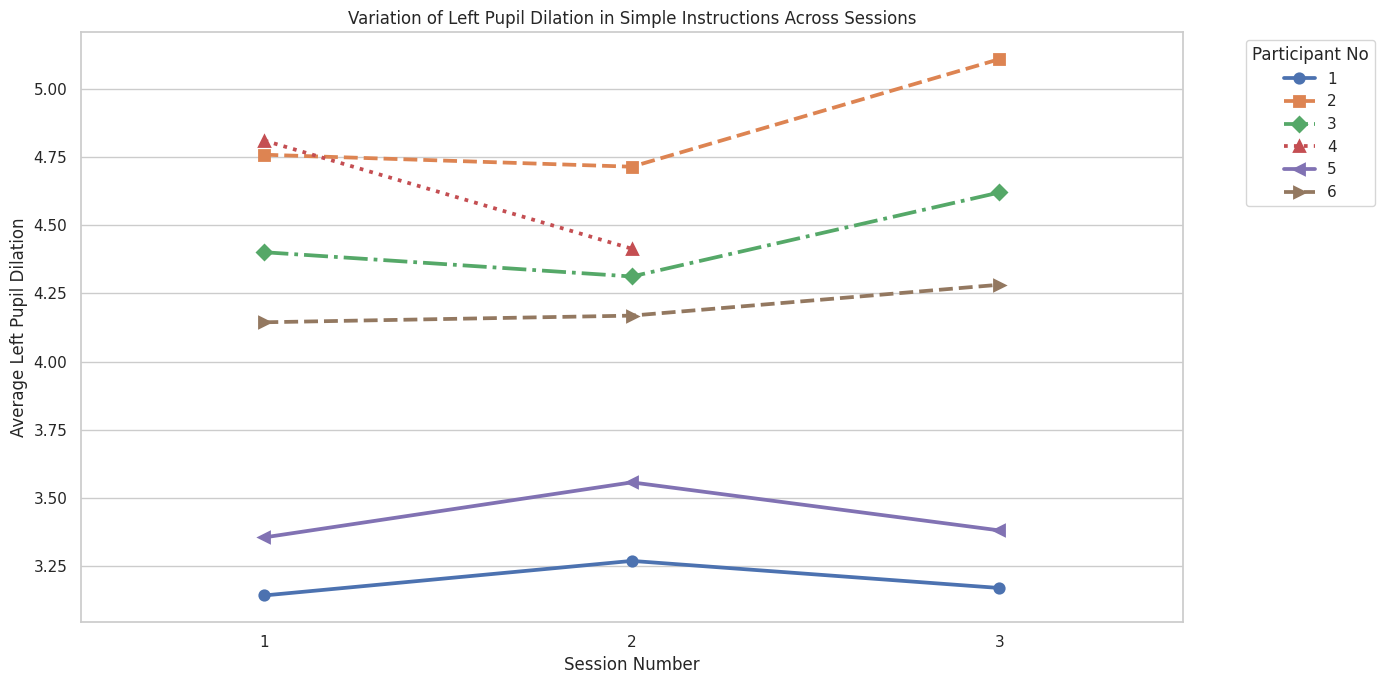

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a sufficient number of markers and linestyles
markers = ['o', 's', 'D', '^', '<', '>', 'p', '*'] * (unique_participants // 8 + 1)  # repeat pattern if needed
linestyles = ['-', '--', '-.', ':'] * (unique_participants // 4 + 1)  # repeat pattern if needed

# Plotting
plt.figure(figsize=(14, 7))
sns.pointplot(
    x='session_no',
    y='simple_instruction_left_pupil',
    hue='participant_no',
    data=session_means,
    markers=markers[:unique_participants],  # slice to fit number of unique participants
    linestyles=linestyles[:unique_participants]  # slice to fit number of unique participants
)
plt.title('Variation of Left Pupil Dilation in Simple Instructions Across Sessions')
plt.ylabel('Average Left Pupil Dilation')
plt.xlabel('Session Number')
plt.legend(title='Participant No', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


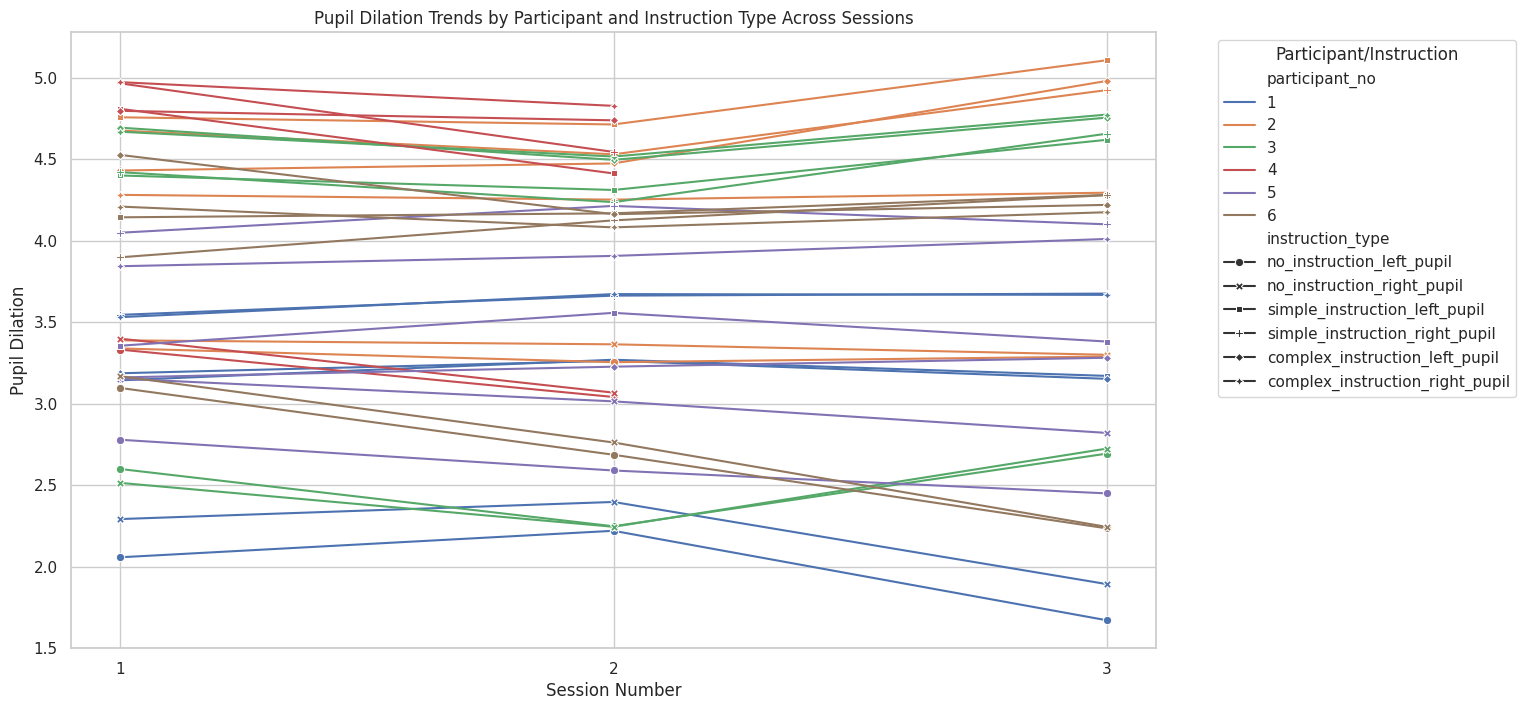

In [149]:
# Prepare data by melting and grouping
melted_data = pd.melt(pupil_data, id_vars=['participant_no', 'session_no'], var_name='instruction_type', value_name='pupil_dilation')

# Line plot for trends over sessions
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_data, x='session_no', y='pupil_dilation', hue='participant_no', style='instruction_type', markers=True, dashes=False)
plt.title('Pupil Dilation Trends by Participant and Instruction Type Across Sessions')
plt.xlabel('Session Number')
plt.ylabel('Pupil Dilation')
plt.legend(title='Participant/Instruction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


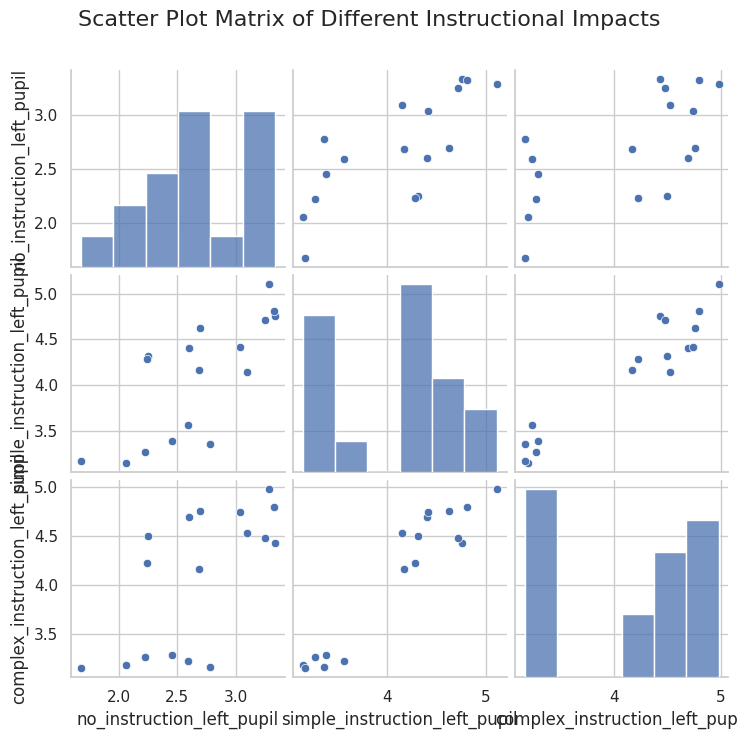

In [152]:
# Select only dilation columns for simplicity
dilation_data = pupil_data[['no_instruction_left_pupil', 'simple_instruction_left_pupil', 'complex_instruction_left_pupil']]  # example with left pupil

# Pairplot to explore relationships between different measurements
sns.pairplot(dilation_data)

plt.subplots_adjust(top=0.9)
plt.suptitle('Scatter Plot Matrix of Different Instructional Impacts', size=16)
plt.show()

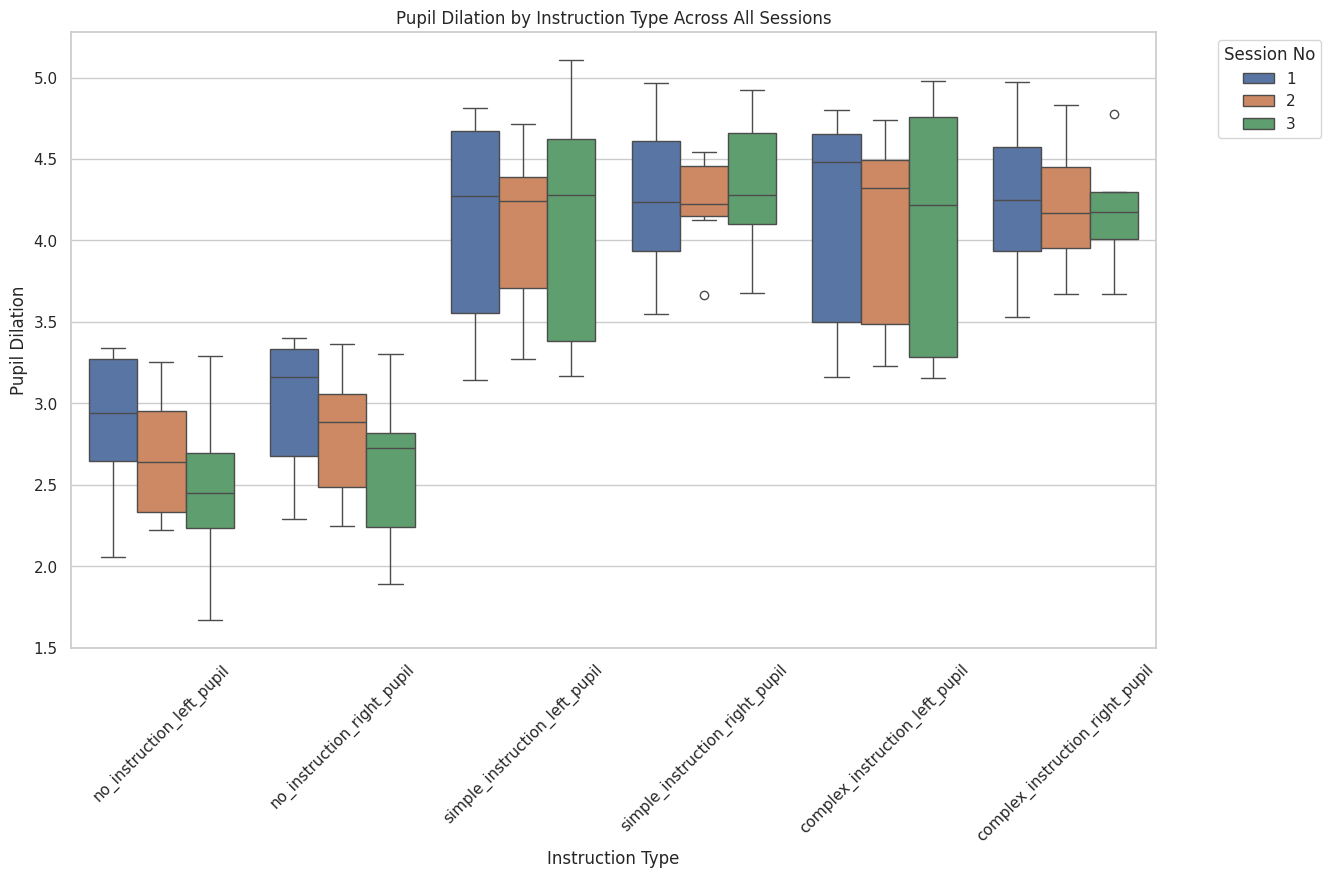

In [153]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='instruction_type', y='pupil_dilation', hue='session_no', data=melted_data)
plt.title('Pupil Dilation by Instruction Type Across All Sessions')
plt.xlabel('Instruction Type')
plt.ylabel('Pupil Dilation')
plt.xticks(rotation=45)
plt.legend(title='Session No', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-154-2821311f234d>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='instruction_type', y='pupil_dilation', hue='participant_no', data=melted_data, split=True, inner='quart', scale='count')


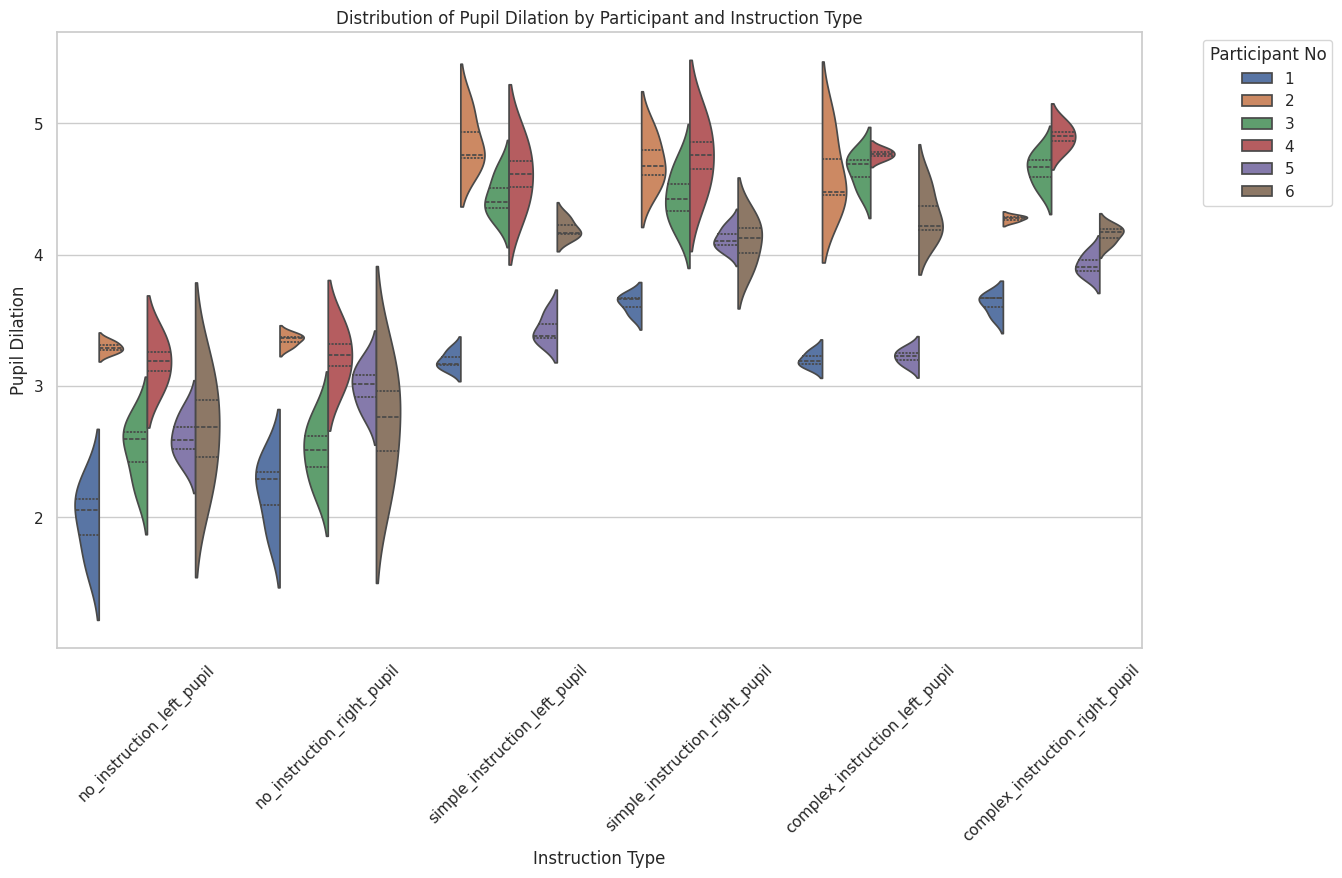

In [154]:
# Grouped violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='instruction_type', y='pupil_dilation', hue='participant_no', data=melted_data, split=True, inner='quart', scale='count')
plt.title('Distribution of Pupil Dilation by Participant and Instruction Type')
plt.xlabel('Instruction Type')
plt.ylabel('Pupil Dilation')
plt.xticks(rotation=45)
plt.legend(title='Participant No', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
